<a href="https://colab.research.google.com/github/tawsinDOTuddin/CloudBookShelf/blob/master/TP_02_Tawsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The goal of this practical is to use the SVM implementation of the scikit-learn library. I start explaining my experiment from **Part-2 (SVM with Scikit-Learn**) as I do not have to report anything for **Part- 01 (Little Warm-Up)**

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]]) #we create 4 examples
y = np.array([-1, -1, 1, 1])
from sklearn.svm import SVC #import de la classe SVC pour SVM
classif=SVC() #we create a SVM with default parameters
classif.fit(X,y) #we learn the model according to given data
res=classif.predict([[-0.8, -1]]) #prediction on a new sample
print(res);

[-1]


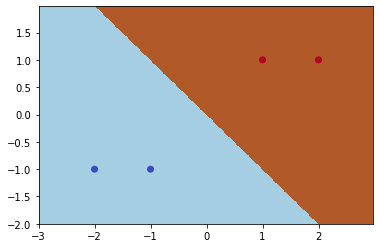

In [ ]:
import matplotlib.pyplot as plt #the library for plotting
#we create a mesh to plot in
h = .02  # grid step
x_min= X[:, 0].min() - 1
x_max= X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#the grid is created, the intersections are in xx and yy

mysvc= SVC(kernel='linear', C = 2.0)
mysvc.fit(X,y)
Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
Z2d=Z2d.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
# We plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

# Now, I am trying to apply different kernel parameters under SVC() to check the effectivity of applying several kernels. 

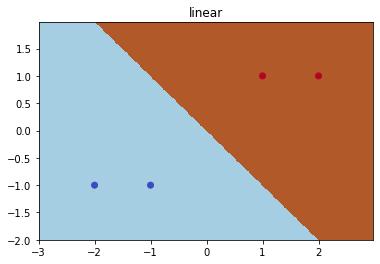

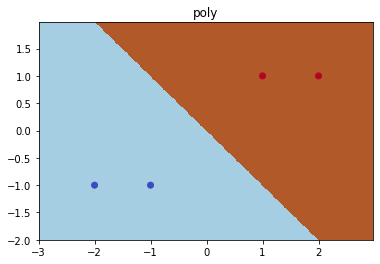

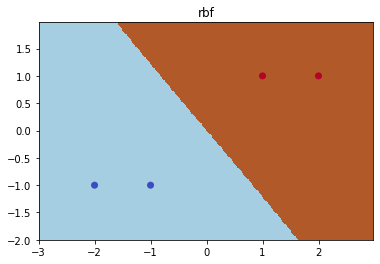

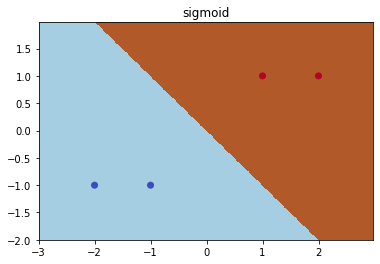

In [ ]:
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel, C=2.0)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(kernel)
    plt.show()


# **I want to draw a comment here:** Due to the fact that I am using quite linearly separable data points here, it is not usual case to show the kernel effectivity. That is why I am going to generate a random data point which are not or hardly linearly separable. So that we can observe the decision boundary difference in kernels

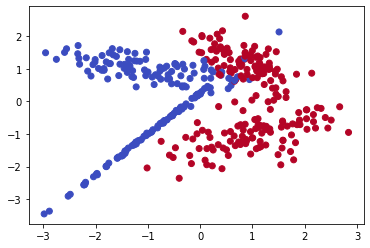

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=400,n_features=2, n_redundant=0, n_informative=2,
                           random_state=3, n_clusters_per_class=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

# Here, I create a random data points which are not linearly separable so that I can demonstrate more clearly that how parameter changes affect the model prediction

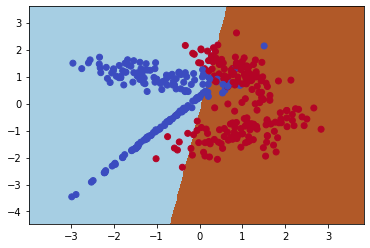

In [ ]:
h = .02  # grid step
x_min= X[:, 0].min() - 1
x_max= X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#the grid is created, the intersections are in xx and yy

mysvc= SVC(kernel='linear', C = 2)
mysvc.fit(X,y)
Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
Z2d=Z2d.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
# We plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

# From the plot given above, I can say that in this case linear kernel is having some misclassification. Now I will run a for loop with different kernels to show how they draw the decision boundary to separate the classes.

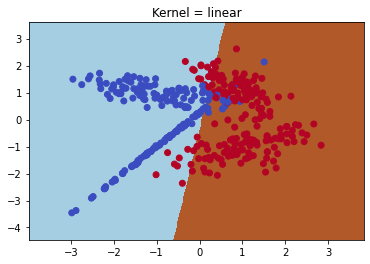

5-Fold Cross Validation -> 'linear' kernel
[0.8625 0.875  0.9375 0.825  0.9625]
0.89 accuracy with a standard deviation of 0.05


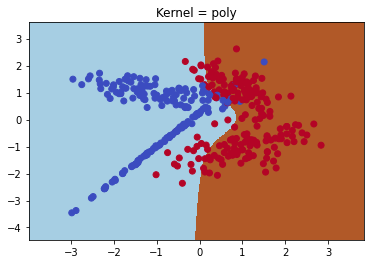

5-Fold Cross Validation -> 'poly' kernel
[0.875  0.8875 0.95   0.8375 0.925 ]
0.89 accuracy with a standard deviation of 0.04


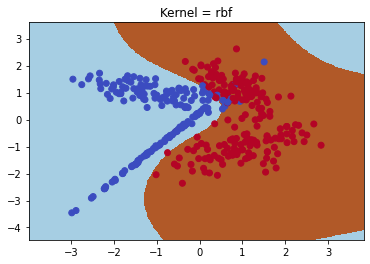

5-Fold Cross Validation -> 'rbf' kernel
[0.9625 0.9375 0.975  0.925  0.9875]
0.96 accuracy with a standard deviation of 0.02


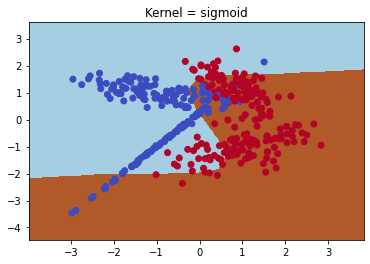

5-Fold Cross Validation -> 'sigmoid' kernel
[0.8    0.7875 0.8125 0.775  0.7625]
0.79 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn.model_selection import cross_val_score
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Kernel = " + kernel)
    plt.show()
    print("5-Fold Cross Validation -> " +"'"+ kernel +"'" + " kernel")
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# If we observe the decision boundary all the kernels, we can see that kernels use non linear hyperplane for drawing decision boundary except linear kernel. Here, "rbf" kernel is giving us a  decision surface that almost perfectly separate the data points.


#The RBF feature space has an infinite number of dimensions. This means that we can utilise the kernel to build very complex decision boundaries. The more dimensions, the better chance we’ll find a hyperplane that neatly separates our data.



# **I want to include a comment here:** I run 5-Fold cross validation for each of the kernels so that I can related the decision surface with the cross validation result (which is asked in excercise 3.1). For better understanding, I calculate the mean of the 5 cross validation results and also standard deviation. The decision surface matches my cross-validation result. I get highest validation accuracy (0.96 with a standard deviation 0.02) when I use "rbf" kernel.

##################################################################################################

# For the following steps, I will be using rbf kernel. Now, I take into account another parameter C which is basically the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

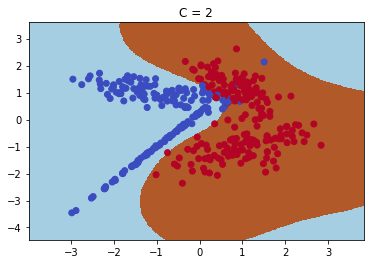

5-Fold Cross Validation -> C = 2
[0.9625 0.9375 0.975  0.95   0.975 ]
0.96 accuracy with a standard deviation of 0.01


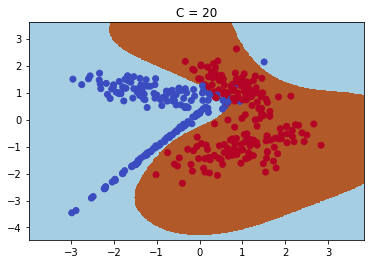

5-Fold Cross Validation -> C = 20
[0.95   0.95   0.975  0.9375 0.9625]
0.96 accuracy with a standard deviation of 0.01


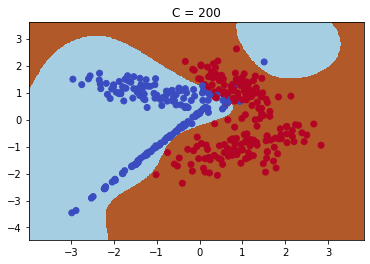

5-Fold Cross Validation -> C = 200
[0.9625 0.9625 0.925  0.95   0.9875]
0.96 accuracy with a standard deviation of 0.02


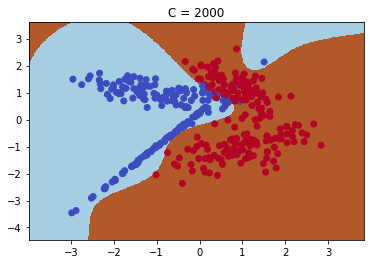

5-Fold Cross Validation -> C = 2000
[0.975  0.95   0.9625 0.95   0.975 ]
0.96 accuracy with a standard deviation of 0.01


In [ ]:
for c in (2, 20, 200, 2000):
    mysvc = SVC(kernel='rbf', C=c)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("C = " + str(c))
    plt.show()
    print("5-Fold Cross Validation -> " + "C = " + str(c))
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# **C (Regularisation):** C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how I can control the trade-off between decision boundary and misclassification term.

# However, although the incerase in C value help us improve the decision boundary, we risk our model to get overfitted on the training dataset. 

#I consider C=2 in this to avoid model overfitting issue. I might also take C=20 but this one changes its decision surface boundary just to include single misclassified datapoint (upper right corner) which I can compromise.

##################################################################################################

#  The **gamma** parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. 

#In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other.

#But In scikit-learn documentation, I found two parameters for gamma which are "scale" and "auto". For "scale", the kernel coefficient is calculate by 1/(n_features * X.var()) which means feature normalization is scaled according to x variable while in the case of "auto" it is 1/n_features.


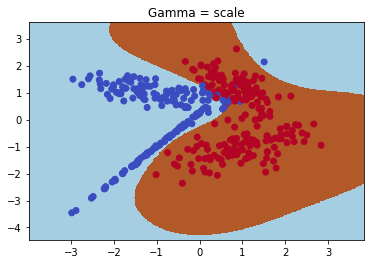

5-Fold Cross Validation -> gamma = scale
[0.95   0.95   0.975  0.9375 0.9625]
0.96 accuracy with a standard deviation of 0.01


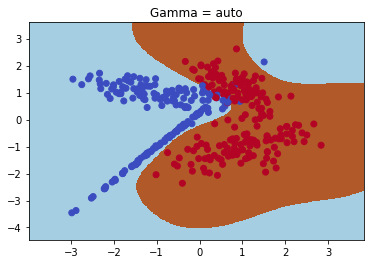

5-Fold Cross Validation -> gamma = auto
[0.95   0.95   0.9625 0.95   0.975 ]
0.96 accuracy with a standard deviation of 0.01


In [ ]:
for Gamma in ('scale','auto'):
    mysvc = SVC(kernel='rbf', C=20 ,gamma = Gamma)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()])                           # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Gamma = " + str(Gamma))
    plt.show()
    print("5-Fold Cross Validation -> " + "gamma = " + Gamma)
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# We can see that gamma with both values give us same mean validation accuracy with the standard daviation. So, I can choose either of two which is "scale"

##################################################################################################

#**degree** is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data. Now, I make change in degree parameter (taking 0, 1, 2, 3, 4 values) and observe the outputs.

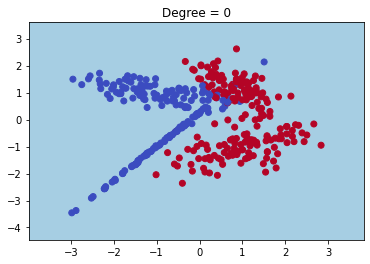

5-Fold Cross Validation - degree = 0
[0.5125 0.5    0.5    0.5    0.5   ]
0.50 accuracy with a standard deviation of 0.00


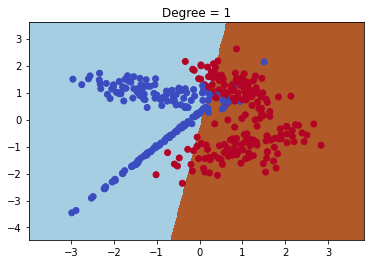

5-Fold Cross Validation - degree = 1
[0.875  0.875  0.9375 0.825  0.9625]
0.90 accuracy with a standard deviation of 0.05


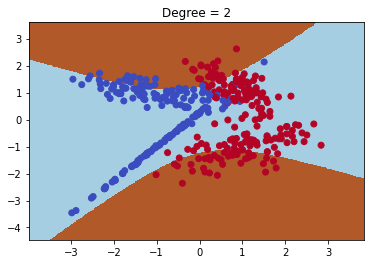

5-Fold Cross Validation - degree = 2
[0.6625 0.575  0.55   0.6    0.5625]
0.59 accuracy with a standard deviation of 0.04


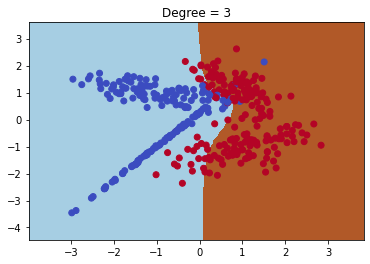

5-Fold Cross Validation - degree = 3
[0.8875 0.8875 0.9    0.8375 0.925 ]
0.89 accuracy with a standard deviation of 0.03


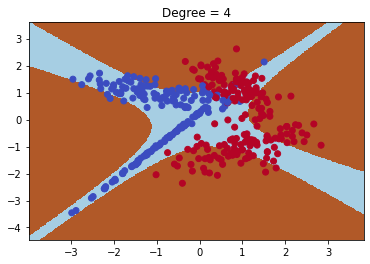

5-Fold Cross Validation - degree = 4
[0.7625 0.7    0.7    0.6625 0.675 ]
0.70 accuracy with a standard deviation of 0.03


In [ ]:
for degree in (0, 1, 2, 3, 4):
    mysvc = SVC(kernel='poly', C=20 ,gamma = 'scale', degree = degree)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Degree = " + str(degree))
    plt.show()
    print("5-Fold Cross Validation - " + "degree = " + str(degree))
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Using degree=1 is the same as using a ‘linear’ kernel. Also, increasing this parameters help to achieve better decision surface but also leads to higher training times. Here also, we have to considered the risk of model overfitting while deciding the value of degree.

#The linear kernel giving me better result with 90% validation accuracy with a standard deviation of 5



---

# **Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

#In the figure below, the support vectors for our mysvc() model are displayed by the yellow datapoints that contribute in building the hyperplane.

#Note: I include **plt.savefig()** to save my plot as png format

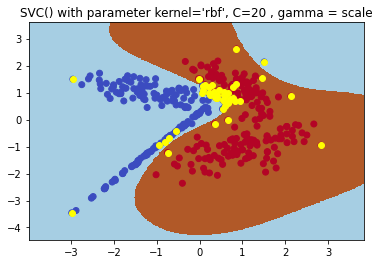

5-Fold Cross Validation
[0.95   0.95   0.975  0.9375 0.9625]
0.96 accuracy with a standard deviation of 0.01


In [ ]:
mysvc = SVC(kernel='rbf', C=20 ,gamma = 'scale')
mysvc.fit(X, y)
Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
Z2d=Z2d.reshape(xx.shape)
support_vectors = mysvc.support_vectors_
plt.figure()
plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
# We plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
plt.title("SVC() with parameter kernel='rbf', C=20 , gamma = scale")
plt.savefig('Plot.png')    # save the plot
plt.show()
print("5-Fold Cross Validation")
score = cross_val_score(mysvc, X, y, cv=None)
print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

#So, after experiments, I choose the parameters: **kernel='rbf', C=20 , gamma = scale"** that gives highest **96%** validation accuracy (mean) with standard deviation of **1**.

# **The 2-moons dataset:**
Applying different parameters for svc() classifier for this dataset to achieve the fine tuned classifier. 

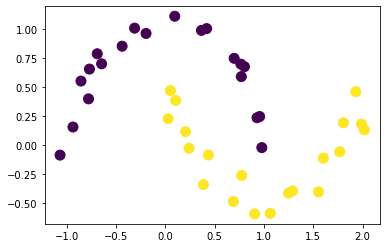

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X, y = make_moons(noise = 0.1, random_state=1, n_samples=40)
plt.scatter(X[:,0],X[:,1], c = y, s = 100)

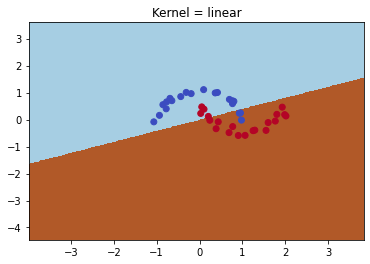

5-Fold Cross Validation -> 'linear' kernel
[0.75  0.875 0.875 0.75  0.875]
0.82 accuracy with a standard deviation of 0.06


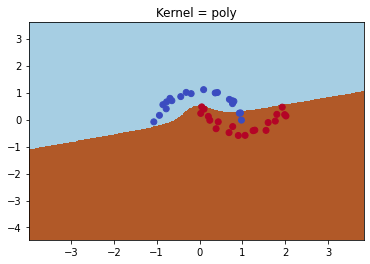

5-Fold Cross Validation -> 'poly' kernel
[0.875 0.875 0.875 0.875 0.875]
0.88 accuracy with a standard deviation of 0.00


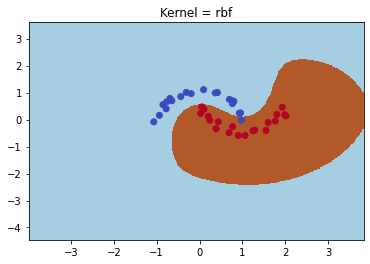

5-Fold Cross Validation -> 'rbf' kernel
[1.    1.    1.    0.875 1.   ]
0.97 accuracy with a standard deviation of 0.05


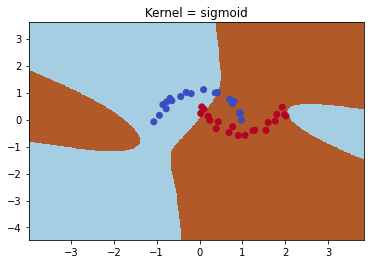

5-Fold Cross Validation -> 'sigmoid' kernel
[0.75  0.625 0.625 0.75  0.625]
0.68 accuracy with a standard deviation of 0.06


In [ ]:
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Kernel = " + kernel)
    plt.show()
    print("5-Fold Cross Validation -> " +"'"+ kernel +"'" + " kernel")
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Here we can observe from above figures that "rbf" kernel having best performance among the kernels with 97% validation accuracy (mean) with a standard deviation of 5.

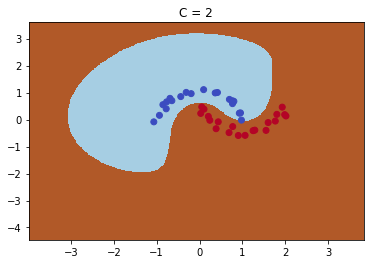

5-Fold Cross Validation -> C = 2
[1.    1.    1.    0.875 1.   ]
0.97 accuracy with a standard deviation of 0.05


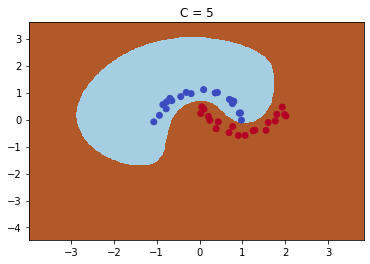

5-Fold Cross Validation -> C = 5
[1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00


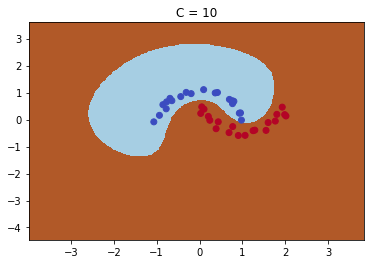

5-Fold Cross Validation -> C = 10
[1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00


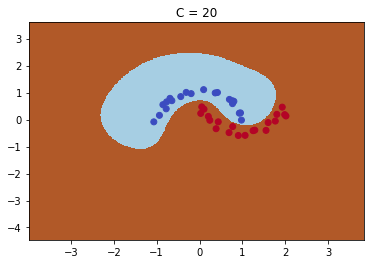

5-Fold Cross Validation -> C = 20
[1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00


In [ ]:
for c in (2, 5, 10, 20):
    mysvc = SVC(kernel='rbf', C=c)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("C = " + str(c))
    plt.show()
    print("5-Fold Cross Validation -> " + "C = " + str(c))
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Although both C=10 and C=20 are giving me 100% validation accuracy (mean), I choose C=10 to avoid model overfitting risk.

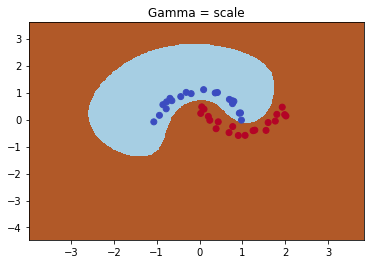

5-Fold Cross Validation -> gamma = scale
[1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00


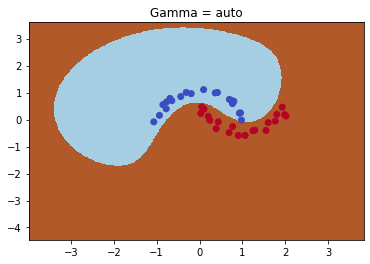

5-Fold Cross Validation -> gamma = auto
[1.    1.    1.    0.875 1.   ]
0.97 accuracy with a standard deviation of 0.05


In [ ]:
for Gamma in ('scale','auto'):
    mysvc = SVC(kernel='rbf', C=10 ,gamma = Gamma)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Gamma = " + str(Gamma))
    plt.show()
    print("5-Fold Cross Validation -> " + "gamma = " + Gamma)
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Gamma= "scale" is preferable as it is giving us better mean validation accuracy (100%) with zero standard daviation

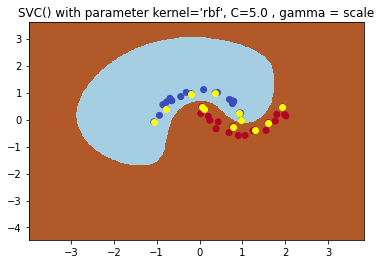

5-Fold Cross Validation
[1. 1. 1. 1. 1.]
1.00 accuracy with a standard deviation of 0.00


In [ ]:
mysvc = SVC(kernel='rbf', C=5.0 ,gamma = 'scale')
mysvc.fit(X, y)
Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
Z2d=Z2d.reshape(xx.shape)
support_vectors = mysvc.support_vectors_
plt.figure()
plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
# We plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
plt.title("SVC() with parameter kernel='rbf', C=5.0 , gamma = scale")
plt.savefig('Plot.png')    # save the plot
plt.show()
print("5-Fold Cross Validation")
score = cross_val_score(mysvc, X, y, cv=None)
print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

#So, considering the previous experiments, I choose the parameters: **kernel='rbf', C=10 , gamma = scale"** that gives me **100%** validation accuracy (mean) with **zero** standard deviation.



---

# **The Iris Dataset:**

#The following code shows the loading of the iris dataset and the plotting of data points based on sepal length and sepal width attributes. The rest of the implemention will be on these two attributes instead of the whole dataset. 

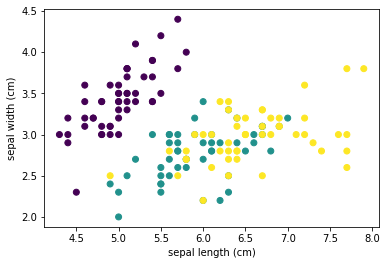

In [ ]:
from sklearn.datasets import load_iris #data are loaded 
irisData = load_iris()
#print(irisData)
X = irisData.data[:,0:2]                    #Separating the data from targets and keep it in X
y = irisData.target                  #Separating the targets from data and keep it in Y 
x=0
k=1                                               # [8] Display the distribution
# help(plt.scatter)
plt.xlabel(irisData.feature_names[x])
plt.ylabel(irisData.feature_names[k])                        # [9] Annotating the plot in x and y axis
plt.scatter(X[:, x], X[:, k], c=y)
plt.show()


#Applying different parameters for svc() classifier for this dataset to achieve the fine tuned classifier. 

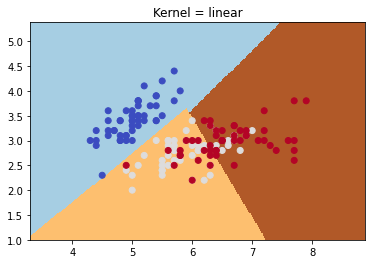

5-Fold Cross Validation -> 'linear' kernel
[0.73333333 0.83333333 0.76666667 0.86666667 0.83333333]
0.81 accuracy with a standard deviation of 0.05


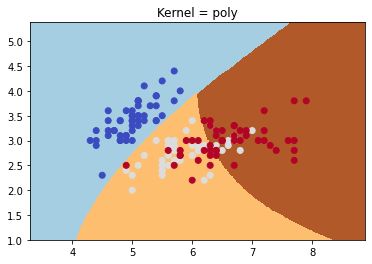

5-Fold Cross Validation -> 'poly' kernel
[0.73333333 0.83333333 0.73333333 0.86666667 0.86666667]
0.81 accuracy with a standard deviation of 0.06


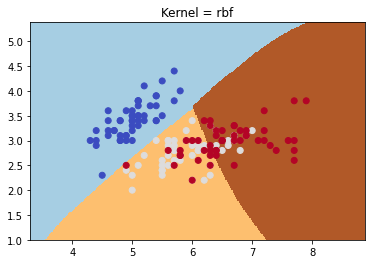

5-Fold Cross Validation -> 'rbf' kernel
[0.73333333 0.86666667 0.76666667 0.86666667 0.86666667]
0.82 accuracy with a standard deviation of 0.06


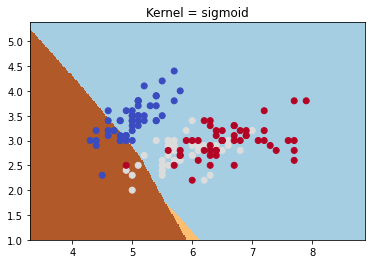

5-Fold Cross Validation -> 'sigmoid' kernel
[0.1        0.26666667 0.3        0.26666667 0.2       ]
0.23 accuracy with a standard deviation of 0.07


In [ ]:
from sklearn.svm import SVC
import numpy as np
h = .02  # grid step
x_min= X[:, 0].min() - 1
x_max= X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Kernel = " + kernel)
    plt.show()
    print("5-Fold Cross Validation -> " +"'"+ kernel +"'" + " kernel")
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Here also we can conclude from above figures that "rbf" kernel having best performance among the kernels with 82% validation accuracy (mean) with a standard deviation of 6. It is interesting to observe here that "linear" kernel performs slightly better than "poly" kernel on this dataset.

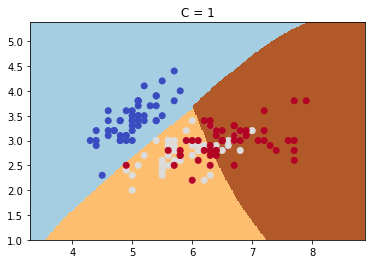

5-Fold Cross Validation -> C = 1
[0.73333333 0.86666667 0.76666667 0.86666667 0.86666667]
0.82 accuracy with a standard deviation of 0.06


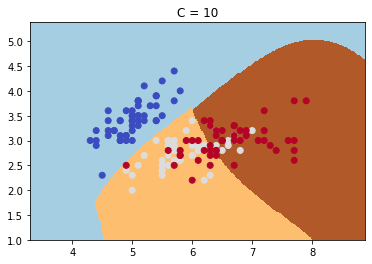

5-Fold Cross Validation -> C = 10
[0.73333333 0.83333333 0.8        0.83333333 0.86666667]
0.81 accuracy with a standard deviation of 0.05


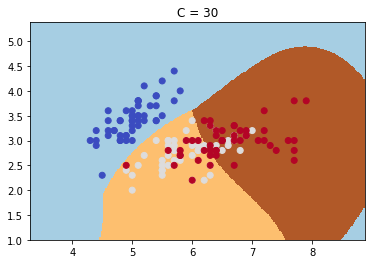

5-Fold Cross Validation -> C = 30
[0.73333333 0.86666667 0.8        0.86666667 0.86666667]
0.83 accuracy with a standard deviation of 0.05


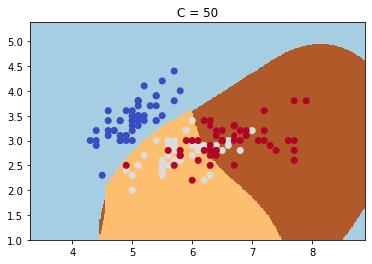

5-Fold Cross Validation -> C = 50
[0.7        0.86666667 0.8        0.9        0.9       ]
0.83 accuracy with a standard deviation of 0.08


In [ ]:
for c in (1, 10, 30, 50):
    mysvc = SVC(kernel='rbf', C=c)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("C = " + str(c))
    plt.show()
    print("5-Fold Cross Validation -> " + "C = " + str(c))
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Here, C=30 gives me 83% validation accuracy (mean) with a standard deviation of 5 and so I select C=30. 

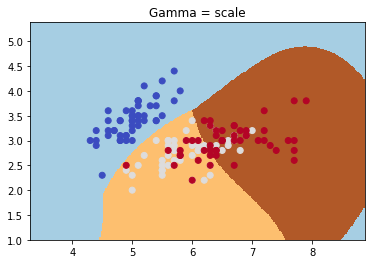

5-Fold Cross Validation -> gamma = scale
[0.73333333 0.86666667 0.8        0.86666667 0.86666667]
0.83 accuracy with a standard deviation of 0.05


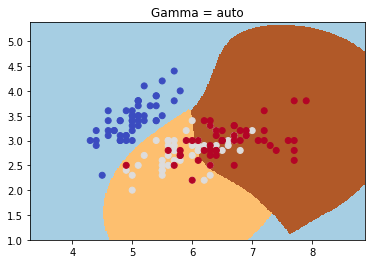

5-Fold Cross Validation -> gamma = auto
[0.7        0.83333333 0.73333333 0.86666667 0.83333333]
0.79 accuracy with a standard deviation of 0.06


In [ ]:
for Gamma in ('scale','auto'):
    mysvc = SVC(kernel='rbf', C=30 ,gamma = Gamma)
    mysvc.fit(X, y)
    Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
    Z2d=Z2d.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
    # We plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("Gamma = " + str(Gamma))
    plt.show()
    print("5-Fold Cross Validation -> " + "gamma = " + Gamma)
    score = cross_val_score(mysvc, X, y, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# Gamma= "scale" is preferable as it is giving us better mean validation accuracy (83%) with standard daviation of 5.  

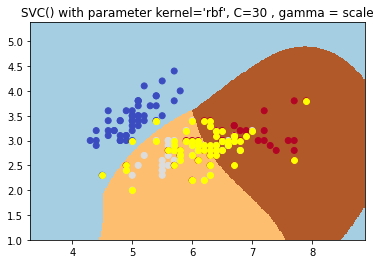

5-Fold Cross Validation
[0.73333333 0.86666667 0.8        0.86666667 0.86666667]
0.83 accuracy with a standard deviation of 0.05


In [ ]:
mysvc = SVC(kernel='rbf', C=30)     #by-default gamma = 'scale'
mysvc.fit(X, y)
Z2d = mysvc.predict(np.c_[xx.ravel(),yy.ravel()]) # we predict all the grid
Z2d=Z2d.reshape(xx.shape)
support_vectors = mysvc.support_vectors_
plt.figure()
plt.pcolormesh(xx,yy,Z2d, cmap=plt.cm.Paired)
# We plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='yellow')
plt.title("SVC() with parameter kernel='rbf', C=30 , gamma = scale")
plt.savefig('Plot.png')    # save the plot
plt.show()
print("5-Fold Cross Validation")
score = cross_val_score(mysvc, X, y, cv=None)
print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

#So, after conducting experiments with several parameters, I choose the parameters: **kernel='rbf', C=30 , gamma = scale"** that gives highest **83%** validation accuracy (mean) with standard deviation of **5**.



---


# [4] Experiment with a real dataset "AirQualityUCI.xlsx"

In [1]:
from google.colab import files # Only if you are using colab
upload = files.upload() # Only if you are using colab
import pandas as pd
input_file = "AirQualityUCI.xlsx"
df = pd.read_excel(input_file)

#Here, I upload the "AirQualityUCI.xlsx" excel file on the colab and reading it as pandas dataframe.

In [ ]:
df.head()   #Display the first 5 rows of the dataframe.
#df.shape

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


#Now, If we observe the dataframe, all the columns are numeric except the first two columns which are "Date" and "Time". So, for the benefits of numeric leaning module, we will drop/remove these two columns.

In [2]:
df = df.drop(['Date', 'Time'], axis = 1)
#df.head()
df.tail()  # Displaying last five rows
#df.shape

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


# From the table displayed above, we can see that it contains -200 values which should be considered as missing values. In next step, I will convert these -200 values to "NaN" (Null value) and the try to process these values which will be discussed sequentially.

In [3]:
#for col in range ('CO(GT)' ,'PT08.S1(CO)' ,'NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH')
import numpy as np
df.replace({-200: np.NaN}, inplace=True) # All the -200 are replaced by null value)
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2.2,1070.75,NaN,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


# Now we can see that all the -200 values are replaced by NaN (for example, if we observe the NMHC(GT) column).

######################################################################################

#Now, according to the instruction given to us at first point:

"We define an ozone peak as an average concentration of CO greater than 1.2. Assuming that this value (non normalized) is located in the rst column of a matrix Z, then you can use the following command to create your classes: y = Z[:,0] > 1.2"

# So, before converting the first column to class label, we have to consider that we have Null values in this column. As this is going to be our class attribute, it is not a good idea at all to replace these Null values with column's mean value because this is our target class and so we can not assume or fill these values with mean. What I can do, I can find those Null values from that column and drop the correnponding rows. 

# **It should also be noted that,** in the case of other attributes, I replace the Null values with corresponding column's mean value.

In [4]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
#df.fillna(df.mean(), inplace=True)
for col in df:
   if col =='CO(GT)':
      df[col].dropna(inplace = True)
      continue
   print("Before Data Cleaning")
   print(df[col])
   #Finding the mean of the column having NaN
   # mean of values in the same column
   df[col].fillna(value=df[col].mean(), inplace=True)
   print("After Data Cleaning")
   print(df[col])
df.tail()

Before Data Cleaning
0       1360.00
1       1292.25
2       1402.00
3       1375.50
4       1272.25
         ...   
9352    1314.25
9353    1162.50
9354    1142.00
9355    1002.50
9356    1070.75
Name: PT08.S1(CO), Length: 9357, dtype: float64
After Data Cleaning
0       1360.00
1       1292.25
2       1402.00
3       1375.50
4       1272.25
         ...   
9352    1314.25
9353    1162.50
9354    1142.00
9355    1002.50
9356    1070.75
Name: PT08.S1(CO), Length: 9357, dtype: float64
Before Data Cleaning
0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352      NaN
9353      NaN
9354      NaN
9355      NaN
9356      NaN
Name: NMHC(GT), Length: 9357, dtype: float64
After Data Cleaning
0       150.000000
1       112.000000
2        88.000000
3        80.000000
4        51.000000
           ...    
9352    218.811816
9353    218.811816
9354    218.811816
9355    218.811816
9356    218.811816
Name: NMHC(GT), Length: 9357, dtype: float64
Before Data Clean

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2.1,1002.50,218.811816,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2.2,1070.75,218.811816,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


# If we observe the "NMHC(GT)" column again, Null values are now replaced by the mean value of that column. 



---

#Now, I determine the class attribute by applying the threshold (1.2) on the "CO(GT)" attribute. Separate it from the data and put it in label variable while keeping the other attributes in data variable. So, I obtain **data matrix and label set**.

In [ ]:
df.shape
data = df.iloc[:,1:13]
label = df.iloc[:,0] > 1.2

In [ ]:
data.shape
#label.shape

(9357, 12)

In [ ]:
print(label)

0       True
1       True
2       True
3       True
4       True
        ... 
9352    True
9353    True
9354    True
9355    True
9356    True
Name: CO(GT), Length: 9357, dtype: bool


# Now I split the datset into training and test set with a splitting ratio of 70:30

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
import random # to generate random numbers
from sklearn.model_selection import cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(data,label,        # Spliting dataset into train and test with spliting ration 70:30
                  test_size=0.3,random_state=random.seed())

# Next step I will do experiments with different parameters of SVC() on our real dataset.

In [ ]:
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " +"'"+ kernel +"'" + " kernel")
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.3f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> 'linear' kernel
[0.78205128 0.5758547  0.75681454 0.79583111 0.88401924]
0.759 accuracy with a standard deviation of 0.101


5-Fold Cross Validation -> 'poly' kernel
[0.79166667 0.65544872 0.74452165 0.80277926 0.84874399]
0.769 accuracy with a standard deviation of 0.066


5-Fold Cross Validation -> 'rbf' kernel
[0.80662393 0.76923077 0.81186531 0.80224479 0.85729556]
0.809 accuracy with a standard deviation of 0.028


5-Fold Cross Validation -> 'sigmoid' kernel
[0.39155983 0.28899573 0.31266702 0.46606093 0.47514698]
0.387 accuracy with a standard deviation of 0.076




# **I want to include a comment here:** At first, I fill the missing values with the mean of that column. I found another way to deal with the missing values which is filling null using linear interpolation and according to [1], this operation performs better than mean. The drawback of using mean method is given below-

"*The  R2  values  of  linear  interpolation  method  for  all  percentages  of  missing  values  are  from  0.69  to  0.86  whereas  mean  method  is  0.00  for  all  percentage  of  missing  values.  This  is  consistent  with  that  reported  by  Junninen  et  al.  (2004)  which  stated  that  the  substitution  of  mean  values  for  missing  data  disrupt  the  inherent  sructure  of  the  data  and  lead  to  large  error in the matrix correlation thus degrading the performance of the statistical modelling.*"


#Now, I re-run the codes again but this time I use linear interpolation instead of mean to replace the null values.



**[1]** Noor, N.M., Al Bakri Abdullah, M.M., Yahaya, A.S. and Ramli, N.A., 2015. Comparison of linear interpolation method and mean method to replace the missing values in environmental data set. In Materials Science Forum (Vol. 803, pp. 278-281). Trans Tech Publications Ltd.

In [ ]:
from google.colab import files # Only if you are using colab
upload = files.upload() # Only if you are using colab
import pandas as pd
input_file = "AirQualityUCI.xlsx"
df = pd.read_excel(input_file)
df = df.drop(['Date', 'Time'], axis = 1)
#df.head()
df.tail()  # Displaying last five rows
import numpy as np
df.replace({-200: np.NaN}, inplace=True) # All the -200 are replaced by null value)
df.tail()
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
df.dropna(subset = ['CO(GT)'],inplace = True)
for col in df:
   if col =='CO(GT)':    
      continue
   print(df.shape)
   print("Before Data Cleaning")
   print(df[col])
   df[col].interpolate(method ='linear', limit_direction ='forward', inplace=True)   #replacing missing values with linear interpolation
   print("After Data Cleaning")
   print(df[col])
data = df.iloc[:,1:13]
label = df.iloc[:,0] > 1.2

(7674, 13)
Before Data Cleaning
0       1360.00
1       1292.25
2       1402.00
3       1375.50
4       1272.25
         ...   
9352    1314.25
9353    1162.50
9354    1142.00
9355    1002.50
9356    1070.75
Name: PT08.S1(CO), Length: 7674, dtype: float64
After Data Cleaning
0       1360.00
1       1292.25
2       1402.00
3       1375.50
4       1272.25
         ...   
9352    1314.25
9353    1162.50
9354    1142.00
9355    1002.50
9356    1070.75
Name: PT08.S1(CO), Length: 7674, dtype: float64
(7674, 13)
Before Data Cleaning
0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352      NaN
9353      NaN
9354      NaN
9355      NaN
9356      NaN
Name: NMHC(GT), Length: 7674, dtype: float64
After Data Cleaning
0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352    275.0
9353    275.0
9354    275.0
9355    275.0
9356    275.0
Name: NMHC(GT), Length: 7674, dtype: float64
(7674, 13)
Before Data Cleaning
0       11.881723


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
import random # to generate random numbers
from sklearn.model_selection import cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(data,label,        # Spliting dataset into train and test with spliting ration 70:30
                  test_size=0.3,random_state=random.seed())

In [ ]:
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " +"'"+ kernel +"'" + " kernel")
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> 'linear' kernel
[0.91009772 0.91986971 0.94462541 0.89641694 0.92046936]
0.9183 accuracy with a standard deviation of 0.0158


5-Fold Cross Validation -> 'poly' kernel
[0.91986971 0.90162866 0.94788274 0.90749186 0.90026076]
0.9154 accuracy with a standard deviation of 0.0176


5-Fold Cross Validation -> 'rbf' kernel
[0.91921824 0.91400651 0.93876221 0.91140065 0.90156454]
0.9170 accuracy with a standard deviation of 0.0123


5-Fold Cross Validation -> 'sigmoid' kernel
[0.27882736 0.37589577 0.39934853 0.49837134 0.60691004]
0.4319 accuracy with a standard deviation of 0.1120




# As we can see that validation accuracy get improved by roughly 12-15% when I adopt linear interpolation method instead of mean. In my case, svm with linear kernel is giving me better result (91.83% validation accuracy with a standard deviation of 1.5) compare to other models.

In [ ]:
for c in (2, 15, 30):
    mysvc = SVC(kernel='linear', C=c)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " + "C = " + str(c))
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> C = 2
[0.93420195 0.91074919 0.94788274 0.9009772  0.89830508]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> C = 15
[0.93224756 0.90684039 0.95114007 0.90032573 0.90482399]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> C = 30
[0.93355049 0.90684039 0.94983713 0.90032573 0.90091265]
0.92 accuracy with a standard deviation of 0.02




# Experiments with C values give me similar results here which is 92% of validation accuracy with standard daviation of 2.

In [ ]:
for Gamma in ('scale','auto'):
    mysvc = SVC(kernel='linear',gamma = Gamma)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " + "gamma = " + Gamma)
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> gamma = scale
[0.93355049 0.90749186 0.9485342  0.89967427 0.90286832]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> gamma = auto
[0.93355049 0.90749186 0.9485342  0.89967427 0.90286832]
0.92 accuracy with a standard deviation of 0.02




# Here, validation accuracy is invariant of different gamma values.

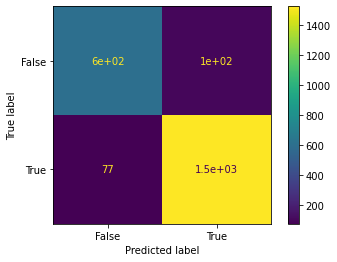

              precision    recall  f1-score   support

       False       0.89      0.86      0.87       703
        True       0.94      0.95      0.95      1600

    accuracy                           0.92      2303
   macro avg       0.91      0.90      0.91      2303
weighted avg       0.92      0.92      0.92      2303

[0.93355049 0.90749186 0.9485342  0.89967427 0.90286832]
0.92 accuracy with a standard deviation of 0.02




In [ ]:
clf = SVC(kernel='linear')
clf = clf.fit(X_train, Y_train)                                                       
Y_pred =clf.predict(X_test)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test) 
plt.show()
print(classification_report(Y_test, Y_pred))
#print(cm)

score = cross_val_score(clf, data, label, cv=None)
print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
print('\n')

# Here, I keep default parameters for SVC() classifier except the kernel as classification results were identical for both C and gamma value. I generate a classification report with a confusion matrix so that I can visualize the recall, precision result. The mean F1 score is 0.910. The best parameters of SVC() giving me 92% of validation accuracy with a standard daviation of 2 **(without data normalization)**.



---
#Now I apply the procedures again but this time I normalize the data with StandardScaler() function.


In [ ]:
from sklearn.preprocessing import StandardScaler
# normalize dataset for easier parameter selection
data = StandardScaler().fit_transform(data) #where X is your data matrix
#label = StandardScaler().fit_transform(label) #where X is your data matrix

In [ ]:
from sklearn.model_selection import train_test_split 
import random # to generate random numbers
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
X_train,X_test,Y_train,Y_test = train_test_split(data,label,        # Spliting dataset into train and test with spliting ration 70:30
                  test_size=0.3,random_state=random.seed())

In [ ]:
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    mysvc = SVC(kernel=kernel)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " +"'"+ kernel +"'" + " kernel")
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> 'linear' kernel
[0.9257329  0.89967427 0.9485342  0.89967427 0.910691  ]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> 'poly' kernel
[0.92638436 0.89250814 0.94201954 0.89446254 0.84745763]
0.90 accuracy with a standard deviation of 0.03


5-Fold Cross Validation -> 'rbf' kernel
[0.92117264 0.89250814 0.9465798  0.89315961 0.81290743]
0.89 accuracy with a standard deviation of 0.04


5-Fold Cross Validation -> 'sigmoid' kernel
[0.80781759 0.89315961 0.90162866 0.7771987  0.8220339 ]
0.84 accuracy with a standard deviation of 0.05




# Again the SVC() classifier with linear kernel gives me better result (0.92 accuracy with a standard deviation of 0.02) on normalized data.

In [ ]:
for c in (2, 15, 30):
    mysvc = SVC(kernel='linear', C=c)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " + "C = " + str(c))
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> C = 2
[0.92638436 0.90162866 0.94527687 0.89967427 0.91395046]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> C = 15
[0.92638436 0.90162866 0.94397394 0.90032573 0.91199478]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> C = 30
[0.92638436 0.90162866 0.94267101 0.9009772  0.91199478]
0.92 accuracy with a standard deviation of 0.02




In [ ]:
for Gamma in ('scale','auto'):
    mysvc = SVC(kernel='linear',gamma = Gamma)
    mysvc.fit(X_train, Y_train)
    print("5-Fold Cross Validation -> " + "gamma = " + Gamma)
    score = cross_val_score(mysvc, data, label, cv=None)
    print(score)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
    print('\n')

5-Fold Cross Validation -> gamma = scale
[0.9257329  0.89967427 0.9485342  0.89967427 0.910691  ]
0.92 accuracy with a standard deviation of 0.02


5-Fold Cross Validation -> gamma = auto
[0.9257329  0.89967427 0.9485342  0.89967427 0.910691  ]
0.92 accuracy with a standard deviation of 0.02




#After experiments with C and gamma parametrs, we see that validation accuracy results do not change based on these parameter change.

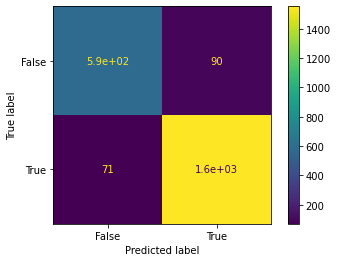

              precision    recall  f1-score   support

       False       0.89      0.87      0.88       680
        True       0.95      0.96      0.95      1623

    accuracy                           0.93      2303
   macro avg       0.92      0.91      0.92      2303
weighted avg       0.93      0.93      0.93      2303

[0.9257329  0.89967427 0.9485342  0.89967427 0.910691  ]
0.92 accuracy with a standard deviation of 0.02




In [ ]:
clf = SVC(kernel='linear')
clf = clf.fit(X_train, Y_train)                                                       
Y_pred =clf.predict(X_test)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test) 
plt.show()
print(classification_report(Y_test, Y_pred))
#print(cm)

score = cross_val_score(clf, data, label, cv=None)
print(score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
print('\n')

#Classification result after normalization improves slightly if we look at the average F1 score which is 0.915. This slight improvement is also visible from the confusion matrix (**False Negative** is 71 which was 77 before and **False positive** is 90 which was 100 before). 

**The reason of applying data normalization:** In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.*

#Another observation I would like to draw that training time is reduced dramatically when I train the model with normalized data.



---

#**Casting the problem into the regression problem to predict the value of Ozone peak**

#Uploading the excel dataset on the colab notebook and reading the dataset as panda dataframe

In [3]:
from google.colab import files # Only if you are using colab
upload = files.upload() # Only if you are using colab
import pandas as pd
input_file = "AirQualityUCI.xlsx"
df = pd.read_excel(input_file)

Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


#**The following code cell serve the objectives given below:**

*   Dropping out the 'Date' and 'Time' column
*   Replacing -200 with null value
*   Dropping the corresponding row(s) if any null value is found in the class attribute (CO(GT))
*   For the other attributes null vaues are replaced by applying interpolation method on that attribute or column.


In [4]:
df.head()
df = df.drop(['Date', 'Time'], axis = 1)
#df.head()
df.tail()  # Displaying last five rows
import numpy as np
df.replace({-200: np.NaN}, inplace=True) # All the -200 are replaced by null value)
df.tail()
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
df.dropna(subset=['CO(GT)'], inplace = True)
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [8]:
df.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,3.1,1314.25,275.0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2.4,1162.50,275.0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2.4,1142.00,275.0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2.1,1002.50,275.0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2.2,1070.75,275.0,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [4]:
df.shape

(7674, 13)

#Now I will try to find how much the other columns are **correlated** to the class label column so that I can obtain the most informative column and also reduce my training time. 


In [20]:
df.corr(method='pearson')    #finding correlation

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.862844,0.268002,0.909767,0.895292,0.793483,-0.695728,0.690180,0.608326,0.837077,0.005256,0.057726,0.034864
PT08.S1(CO),0.862844,1.000000,0.267646,0.880384,0.890245,0.706317,-0.772747,0.636086,0.658089,0.901029,0.008449,0.156302,0.112180
NMHC(GT),0.268002,0.267646,1.000000,0.280566,0.279075,0.122351,-0.285350,0.169221,0.218917,0.234000,0.081714,-0.048809,0.063120
C6H6(GT),0.909767,0.880384,0.280566,1.000000,0.982743,0.709040,-0.731838,0.599528,0.752700,0.855964,0.175870,-0.027514,0.163696
PT08.S2(NMHC),0.895292,0.890245,0.279075,0.982743,1.000000,0.697551,-0.789184,0.629725,0.763615,0.872483,0.212623,-0.051560,0.179527
NOx(GT),0.793483,0.706317,0.122351,0.709040,0.697551,1.000000,-0.658743,0.763767,0.230850,0.775885,-0.264289,0.213678,-0.151386
PT08.S3(NOx),-0.695728,-0.772747,-0.285350,-0.731838,-0.789184,-0.658743,1.000000,-0.641538,-0.504326,-0.799078,-0.088184,-0.102012,-0.193562
NO2(GT),0.690180,0.636086,0.169221,0.599528,0.629725,0.763767,-0.641538,1.000000,0.135857,0.700813,-0.224254,-0.074385,-0.360107
PT08.S4(NO2),0.608326,0.658089,0.218917,0.752700,0.763615,0.230850,-0.504326,0.135857,1.000000,0.554172,0.565456,-0.012610,0.641332
PT08.S5(O3),0.837077,0.901029,0.234000,0.855964,0.872483,0.775885,-0.799078,0.700813,0.554172,1.000000,-0.069462,0.161171,0.041479


#If we observe the first row of the above table, we can see that **PT08.S1(CO),	C6H6(GT),	PT08.S2(NMHC),NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3)** have hight correlation factor with CO(GT). 

In [5]:
df.shape
data = df.loc[:,['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)','NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)' ]]
label = df.iloc[:,0]

#**Note:** Here I keep the class attribute (CO(GT)) as it is because in regression problem, we predict the value of the target attribute. The diffence between a classification and a regression problem is that the output of a classification model is a class (True or False in this case) while the regression gives us a quantity or value.

In [6]:
from sklearn.model_selection import train_test_split 
import random # to generate random numbers
from sklearn.model_selection import cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(data,label,        # Spliting dataset into train and test with spliting ration 70:30
                  test_size=0.3,random_state=random.seed())

#Before training my regression model, I normalize the data matix using the following code.

In [11]:
from sklearn.preprocessing import StandardScaler
# normalize dataset for easier parameter selection
data = StandardScaler().fit_transform(data) #where X is your data matrix
#label = StandardScaler().fit_transform(label) #where X is your data matrix

In [12]:
from sklearn.model_selection import train_test_split 
import random # to generate random numbers
from sklearn.model_selection import cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(data,label,        # Spliting dataset into train and test with spliting ration 70:30
                  test_size=0.3,random_state=random.seed())

#After splitting the dataset with 70:30 splitting ration, I fine tuned the regression model by applying different parameters 

In [14]:
from sklearn.svm import SVR 
for kernel in ('linear', 'poly', 'rbf','sigmoid'):
    clr = SVR(kernel=kernel)
    clr = clr.fit(X_train, Y_train)                                                       
    Y_pred =clr.predict(X_test)
    print(kernel+":")
    print(clr.score(X_test, Y_test, sample_weight=None))
    score = cross_val_score(clr, data, label, cv=None)
    print(score)
    print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
    print('\n')

linear:
0.8862124057371298
[0.88035379 0.90839118 0.94768784 0.77699938 0.85342313]
0.8734 accuracy with a standard deviation of 0.0574


poly:
0.7801666570407999
[0.5976426  0.62066323 0.77200618 0.51686356 0.43641639]
0.5887 accuracy with a standard deviation of 0.1123


rbf:
0.8934044240298061
[0.84915637 0.88651667 0.9227685  0.75994577 0.84510433]
0.8527 accuracy with a standard deviation of 0.0543


sigmoid:
-14664.415195377955
[-15025.96582964 -15845.24065782 -23157.01582227 -24252.4872088
 -22723.59314497]
-20200.8605 accuracy with a standard deviation of 3931.1493




#Here, we can see that SVR() model with linear kernel gives me better result compare to other models. SVR() with linear kernel achieve 87.34% mean validation accuracy with standard deviation of 5.7 in 5-Fold Cross Validation 

In [16]:
from sklearn.svm import SVR 
for C in (2, 15, 30):
    clr = SVR(kernel='linear', C=C)
    clr = clr.fit(X_train, Y_train)                                                       
    Y_pred =clr.predict(X_test)
    print("C="+str(C)+":")
    print(clr.score(X_test, Y_test, sample_weight=None))
    score = cross_val_score(clr, data, label, cv=None)
    print(score)
    print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
    print('\n')

C=2:
0.8862236475551563
[0.88024567 0.90844    0.94768378 0.77691267 0.85330518]
0.8733 accuracy with a standard deviation of 0.0575


C=15:
0.8862232976789415
[0.88049698 0.90840978 0.94765768 0.77691611 0.85338074]
0.8734 accuracy with a standard deviation of 0.0574


C=30:
0.886228848035951
[0.88042554 0.90841503 0.94766256 0.77701514 0.85335612]
0.8734 accuracy with a standard deviation of 0.0574




In [17]:
for Gamma in ('scale','auto'):
    clr = SVR(kernel='linear', C=2)
    clr = clr.fit(X_train, Y_train)                                                       
    Y_pred =clr.predict(X_test)
    print("Gamma="+Gamma+":")
    print(clr.score(X_test, Y_test, sample_weight=None))
    score = cross_val_score(clr, data, label, cv=None)
    print(score)
    print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
    print('\n')

Gamma=scale:
0.8862236475551563
[0.88024567 0.90844    0.94768378 0.77691267 0.85330518]
0.8733 accuracy with a standard deviation of 0.0575


Gamma=auto:
0.8862236475551563
[0.88024567 0.90844    0.94768378 0.77691267 0.85330518]
0.8733 accuracy with a standard deviation of 0.0575




#Validation accuracy does not change with respect to C and Gamma.

#Therefore, my final result for this regression problem is 87.34% validation accuracy (mean) with standard deviation of 5.7
